In [1]:
import pandas as pd
import numpy as np

In [2]:
movies = pd.read_csv('movie_metadata.csv')

In [3]:
# Printing the first 5 entries in the dataset 
# to see how the dataset looks like
movies.shape

(5043, 28)

In [4]:
movies.shape, movies.columns

((5043, 28),
 Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
        'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
        'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
        'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
        'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
        'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
        'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
        'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
       dtype='object'))

# Description of dataset features
Color : Movie is black or coloured
Director_name: Name of the movie director
num_critic_for_reviews : No of critics for the movie
duration: Movie duration in minutes
director_facebook_likes: Number of likes for the Director on his Facebook Page
actor_3_facebook_likes: No of likes for the actor 3 on his/her facebook Page
actor2_name: name of the actor 2
actor_1_facebook_likes: No of likes for the actor 1 on his/her facebook Page
gross: Gross earnings of the movie in Dollars
genres: Film categorization like ‘Animation’, ‘Comedy’, ‘Romance’, ‘Horror’, ‘Sci-Fi’, ‘Action’, ‘Family’
actor_1_name: Name of the actor 1
movie_title: Title of the movie
num_voted_users: No of people who voted for the movie
cast_total_facebook_likes: Total facebook like for the movie
actor_3_name: Name of the actor 3
facenumber_in_poster: No of actors who featured in the movie poster
plot_keywords: Keywords describing the movie plots
movie_imdb_link: Link of the movie link
num_user_for_reviews: Number of users who gave a review
language: Language of the movie
country: Country where movie is produced
content_rating: Content rating of the movie
budget: Budget of the movie in Dollars
title_year: The year in which the movie is released
actor_2_facebook_likes: Facebook likes for the actor 2
imdb_score: IMDB score of the movie
aspect_ratio : Aspect ratio the movie was made in
movie_facebook_likes: Total no of facebook likes for the movie

# 1. Data cleaning 

In [5]:
#No of the missing values in the dataset
movies.isna().sum()

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

In [6]:
# Imputing the dataframe
def replace_missing_values(data):
    # Get the column names by data types
    col_names = data.columns
    col_types = data.dtypes

    # Loop through each column and replace missing values
    for i in range(len(col_names)):
        col_name = col_names[i]
        col_type = col_types[i]
        
        if col_type == 'object':
            # For string columns, use bfill and ffill methods
            data[col_name] = data[col_name].fillna(method='bfill').fillna(method='ffill')
        else:
            # For numerical columns, replace missing values with the mean of the column
            data[col_name] = data[col_name].fillna(movies[col_name].mean())
    

In [7]:
# Imputing all the missing cells
replace_missing_values(movies)

In [8]:
# Get the count of missing values per row
missing_per_row = movies.isnull().sum(axis=1)

# Get the total number of rows with missing values
total_missing_rows = len(missing_per_row[missing_per_row > 0])

total_missing_rows

0

In [9]:
#Checking to see if there are duplicates
movies.duplicated().sum()


43

In [10]:
movies.drop_duplicates(inplace = True)

movies.duplicated().sum()

0

In [11]:
movies.shape

(5000, 28)

# 2. Feauture engineering

In [12]:
#Describing the categorical data
movies.describe(include='object')

,color,director_name,actor_2_name,genres,actor_1_name,movie_title,actor_3_name,plot_keywords,movie_imdb_link,language,country,content_rating
count,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000
unique,2,2398,3032,914,2097,4917,3521,4760,4919,47,65,18
top,Color,Steven Spielberg,Morgan Freeman,Drama,Robert De Niro,King Kong,Ben Mendelsohn,class|gardening|race|school|shoe,http://www.imdb.com/title/tt0360717/?ref_=fn_t...,English,USA,R
freq,4791,27,20,235,49,3,8,4,3,4673,3777,2243


In [13]:
# Droping'movie_title','movie_imdb_link' columns. 
#  This is becuase thery are almost unique, so don't contribute match to outr target variable
movies.drop(columns=['movie_title','movie_imdb_link'],axis=1, inplace=True)

In [14]:
#Label encoding the categorical columns
from sklearn.preprocessing import LabelEncoder
feature_encoding = LabelEncoder()
categorical_features=['color', 'director_name', 'actor_2_name',
        'genres', 'actor_1_name',
        'actor_3_name',
        'plot_keywords',
        'language', 'country', 'content_rating',
       'title_year', 'aspect_ratio']
movies[categorical_features]=movies[categorical_features].apply(lambda x:feature_encoding.fit_transform(x))

In [15]:
#A sample of data after label encoding
movies.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,1,922,723.000000,178.000000,0.0,855.000000,1405,1000.0,7.605058e+08,106,...,3054.000000,11,62,7,2.370000e+08,84,936.0,7.9,9,33000
1,1,794,302.000000,169.000000,563.0,1000.000000,2216,40000.0,3.094042e+08,100,...,1238.000000,11,62,7,3.000000e+08,82,5000.0,7.1,16,0
2,1,2021,602.000000,148.000000,0.0,161.000000,2487,11000.0,2.000742e+08,127,...,994.000000,11,61,7,2.450000e+08,90,393.0,6.8,16,85000
3,1,373,813.000000,164.000000,22000.0,23000.000000,532,27000.0,4.481306e+08,287,...,2701.000000,11,62,7,2.500000e+08,87,23000.0,8.5,16,164000
4,1,600,140.194272,107.201074,131.0,645.009761,2431,131.0,4.846841e+07,753,...,272.770808,11,62,7,3.975262e+07,77,12.0,7.1,14,0


# Correlation to select relevant features

In [16]:
#feature extraction process
corr_matrix = movies.corr()

In [17]:
sortValues = corr_matrix['imdb_score'].sort_values(ascending=False)
print(sortValues)

imdb_score                   1.000000
num_voted_users              0.411141
num_critic_for_reviews       0.304446
num_user_for_reviews         0.291589
duration                     0.261369
movie_facebook_likes         0.249517
gross                        0.168280
director_facebook_likes      0.168264
language                     0.094264
cast_total_facebook_likes    0.085044
actor_2_facebook_likes       0.082201
actor_1_facebook_likes       0.075826
genres                       0.067653
actor_3_facebook_likes       0.051568
content_rating               0.047818
budget                       0.029254
director_name                0.020530
actor_1_name                 0.010085
actor_3_name                 0.006120
actor_2_name                -0.013782
aspect_ratio                -0.024268
plot_keywords               -0.033582
country                     -0.036333
facenumber_in_poster        -0.064309
color                       -0.143677
title_year                  -0.202525
Name: imdb_s

In [18]:
# Create feature subsets which show maximum correlation with the dependent variable
high_corr_data = sortValues[sortValues > abs(0.04)]
# select columns with correlation greater than the threshold
print(high_corr_data)

imdb_score                   1.000000
num_voted_users              0.411141
num_critic_for_reviews       0.304446
num_user_for_reviews         0.291589
duration                     0.261369
movie_facebook_likes         0.249517
gross                        0.168280
director_facebook_likes      0.168264
language                     0.094264
cast_total_facebook_likes    0.085044
actor_2_facebook_likes       0.082201
actor_1_facebook_likes       0.075826
genres                       0.067653
actor_3_facebook_likes       0.051568
content_rating               0.047818
Name: imdb_score, dtype: float64


In [19]:
selected_features = high_corr_data.index.tolist()
print(selected_features)

['imdb_score', 'num_voted_users', 'num_critic_for_reviews', 'num_user_for_reviews', 'duration', 'movie_facebook_likes', 'gross', 'director_facebook_likes', 'language', 'cast_total_facebook_likes', 'actor_2_facebook_likes', 'actor_1_facebook_likes', 'genres', 'actor_3_facebook_likes', 'content_rating']


In [20]:
#Creating a new datasset with selected features
trainingData = movies[selected_features]
trainingData.head()

,imdb_score,num_voted_users,num_critic_for_reviews,num_user_for_reviews,duration,movie_facebook_likes,gross,director_facebook_likes,language,cast_total_facebook_likes,actor_2_facebook_likes,actor_1_facebook_likes,genres,actor_3_facebook_likes,content_rating
0,7.9,886204,723.000000,3054.000000,178.000000,33000,7.605058e+08,0.0,11,4834,936.0,1000.0,106,855.000000,7
1,7.1,471220,302.000000,1238.000000,169.000000,0,3.094042e+08,563.0,11,48350,5000.0,40000.0,100,1000.000000,7
2,6.8,275868,602.000000,994.000000,148.000000,85000,2.000742e+08,0.0,11,11700,393.0,11000.0,127,161.000000,7
3,8.5,1144337,813.000000,2701.000000,164.000000,164000,4.481306e+08,22000.0,11,106759,23000.0,27000.0,287,23000.000000,7
4,7.1,8,140.194272,272.770808,107.201074,0,4.846841e+07,131.0,11,143,12.0,131.0,753,645.009761,7


In [21]:
trainingData['imdb_score'].describe()

count    5000.000000
mean        6.441240
std         1.123984
min         1.600000
25%         5.800000
50%         6.600000
75%         7.200000
max         9.500000
Name: imdb_score, dtype: float64

# Scaling 

In [22]:
# from sklearn.preprocessing import StandardScaler
# # create a StandardScaler object
# scaler = StandardScaler()

In [23]:
# # scale the DataFrame using the StandardScaler
# scaled_data = scaler.fit_transform(trainingData)

In [24]:
# # convert the scaled data back to a DataFrame
# scaled_trainingData = pd.DataFrame(scaled_data, columns=trainingData.columns)
# # print the scaled DataFrame
# scaled_trainingData

In [25]:
# scaled_trainingData.head()

In [26]:
# scaled_trainingData['imdb_score'].describe()

In [27]:
# scaled_trainingData.shape

## Training the model

In [28]:
datasetR = trainingData.copy() #lets keep our original dataset for reference. Here datasetR is for Regression model
datasetC = trainingData.copy() #Here datasetC is for classification model

In [29]:
datasetR.head() #lets keep our original dataset for reference. Here datasetR is for Regression model


,imdb_score,num_voted_users,num_critic_for_reviews,num_user_for_reviews,duration,movie_facebook_likes,gross,director_facebook_likes,language,cast_total_facebook_likes,actor_2_facebook_likes,actor_1_facebook_likes,genres,actor_3_facebook_likes,content_rating
0,7.9,886204,723.000000,3054.000000,178.000000,33000,7.605058e+08,0.0,11,4834,936.0,1000.0,106,855.000000,7
1,7.1,471220,302.000000,1238.000000,169.000000,0,3.094042e+08,563.0,11,48350,5000.0,40000.0,100,1000.000000,7
2,6.8,275868,602.000000,994.000000,148.000000,85000,2.000742e+08,0.0,11,11700,393.0,11000.0,127,161.000000,7
3,8.5,1144337,813.000000,2701.000000,164.000000,164000,4.481306e+08,22000.0,11,106759,23000.0,27000.0,287,23000.000000,7
4,7.1,8,140.194272,272.770808,107.201074,0,4.846841e+07,131.0,11,143,12.0,131.0,753,645.009761,7


In [30]:
# X_train.shape, y_train.shape, X_test.shape, y_test.shape

In [31]:
from sklearn.model_selection import train_test_split
y = datasetR.pop('imdb_score')
X = datasetR
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size = 0.2, random_state = 42)

In [32]:
 X_train.shape, y_train.shape, X_test.shape, y_test.shape

((4000, 14), (4000,), (1000, 14), (1000,))

In [33]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train.values), columns=X_train.columns, index=X_train.index)

In [34]:
X_test = pd.DataFrame(scaler.transform(X_test.values), columns = X_train.columns, index = X_test.index)

In [35]:
X_train.shape

(4000, 14)

In [36]:
# #importing the required libraries
# from sklearn.feature_selection import RFE
# from sklearn.linear_model import LinearRegression

In [37]:
# # Running RFE with the output number of the variable equal to 15
# lm = LinearRegression()
# lm.fit(X_train, y_train)

# rfe = RFE(lm)            # running RFE
# rfe = rfe.fit(X_train, y_train)

In [38]:
# col_rfe = X_train.columns[rfe.support_]
# col_rfe

In [39]:
# X_train.columns[~rfe.support_]

In [40]:
# #Creating a X_train dataframe with rfe varianles
# X_train_rfe = X_train[col_rfe]

In [41]:
# # Adding a constant variable for using the stats model
# import statsmodels.api as sm
# X_train_rfe_constant = sm.add_constant(X_train_rfe)

In [42]:
# lm = sm.OLS(y_train,X_train_rfe_constant).fit()   # Running the linear model

In [43]:
# #Let's see the summary of our linear model
# print(lm.summary())

In [44]:
# X_test_rfe = X_test[col_rfe]
# X_test_rfe_constant = sm.add_constant(X_test_rfe)

In [45]:
# y_pred_linear = lm.predict(X_test_rfe_constant)

In [46]:
# y_pred_linear.values

In [47]:
# y_pred_linear.min(), y_pred_linear.max()

In [48]:
# from sklearn.metrics import mean_squared_error
# mean_squared_error(y_pred_linear, y_test)

In [49]:
y_train_classification = y_train.copy()

In [50]:
y_train_classification

4258    5.3
4713    6.3
809     6.5
3698    7.3
4223    5.8
       ... 
4460    7.3
472     4.6
3115    6.1
3800    7.5
869     6.8
Name: imdb_score, Length: 4000, dtype: float64

In [51]:
# bins = [1, 5, 7, float('Inf')]
# labels = ['Flop Movie', 'Average Movie', 'Hit Movie']
# y_train_class = pd.cut(y_train_classification, bins = bins, labels = labels)

In [52]:
y_train_classification = pd.cut(y_train_classification, bins=[1, 3, 6, float('Inf')], labels=['Flop Movie', 'Average Movie', 'Hit Movie'])

In [53]:
y_train_classification

4258    Average Movie
4713        Hit Movie
809         Hit Movie
3698        Hit Movie
4223    Average Movie
            ...      
4460        Hit Movie
472     Average Movie
3115        Hit Movie
3800        Hit Movie
869         Hit Movie
Name: imdb_score, Length: 4000, dtype: category
Categories (3, object): ['Flop Movie' < 'Average Movie' < 'Hit Movie']

In [54]:
y_test_classification = y_test.copy()

In [55]:
y_test_classification = pd.cut(y_test_classification, bins=[1, 3, 6, float('Inf')], labels=['Flop Movie', 'Average Movie', 'Hit Movie'])

In [56]:
X_train_rfe_classification = X_train.copy()
X_test_rfe_classification = X_test.copy()

In [57]:
y_train_classification.isna().sum()

0

### Random Forest Classifier

In [58]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error

forest_model = RandomForestClassifier(random_state=1)
forest_model.fit(X_train_rfe_classification, y_train_classification)
predicted_rating = forest_model.predict(X_test_rfe_classification)
print(predicted_rating[1:20])

# Check accuracy score 

from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test_classification, predicted_rating)))

['Hit Movie' 'Average Movie' 'Hit Movie' 'Hit Movie' 'Hit Movie'
 'Hit Movie' 'Hit Movie' 'Hit Movie' 'Hit Movie' 'Hit Movie' 'Hit Movie'
 'Average Movie' 'Hit Movie' 'Average Movie' 'Hit Movie' 'Hit Movie'
 'Hit Movie' 'Hit Movie' 'Hit Movie']
Model accuracy score: 0.7790


In [59]:
pip install joblib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [60]:
import joblib
joblib.dump(forest_model, 'rf_model.sav')

['rf_model.sav']








...


**Evaluating the Random Forest Classifier**

In [61]:
from sklearn.metrics import confusion_matrix, classification_report


# View confusion matrix for test data and predictions
confusion_matrix(y_test_classification, predicted_rating)

array([[152,   0, 156],
       [  2,   0,   3],
       [ 60,   0, 627]])

In [62]:
# Get and reshape confusion matrix data
matrix = confusion_matrix(y_test_classification, predicted_rating)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]



Text(0.5, 1.0, 'Confusion Matrix for Random Forest Model')

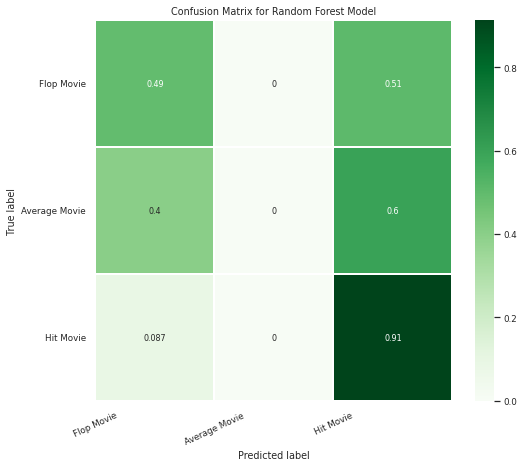

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

# Build the plot
plt.figure(figsize=(8,7))
sns.set(font_scale=0.8)
sns.heatmap(matrix, annot=True, annot_kws={'size':8},
            cmap=plt.cm.Greens, linewidths=0.2)
class_names = ['Flop Movie', 'Average Movie', 'Hit Movie']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')

In [64]:
# View the classification report for test data and predictions
print(classification_report(y_test_classification, predicted_rating))

               precision    recall  f1-score   support

Average Movie       0.71      0.49      0.58       308
   Flop Movie       0.00      0.00      0.00         5
    Hit Movie       0.80      0.91      0.85       687

     accuracy                           0.78      1000
    macro avg       0.50      0.47      0.48      1000
 weighted avg       0.77      0.78      0.76      1000



/home/victory/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/victory/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/victory/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [65]:
param_grid = {
    'n_estimators': [25, 50, 100, 150],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [3, 6, 9],
    'max_leaf_nodes': [3, 6, 9],
}

In [66]:
# GridSearchCV to obtain the best parameters for the model
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(RandomForestClassifier(),
                           param_grid=param_grid)
grid_search.fit(X_train_rfe_classification, y_train_classification)
print(grid_search.best_estimator_)

RandomForestClassifier(max_depth=6, max_features=None, max_leaf_nodes=9,
                       n_estimators=25)


In [67]:
# Applying the best parameters
model_grid = RandomForestClassifier(max_depth=6,
                                    max_features=None,
                                    max_leaf_nodes=9,
                                    n_estimators=25)

model_grid.fit(X_train_rfe_classification, y_train_classification)
y_pred_grid = forest_model.predict(X_test_rfe_classification)

print(classification_report(y_test_classification, y_pred_grid))

               precision    recall  f1-score   support

Average Movie       0.71      0.49      0.58       308
   Flop Movie       0.00      0.00      0.00         5
    Hit Movie       0.80      0.91      0.85       687

     accuracy                           0.78      1000
    macro avg       0.50      0.47      0.48      1000
 weighted avg       0.77      0.78      0.76      1000



/home/victory/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/victory/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/victory/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [68]:
# RandomizedSearchCV to obtain the best parameters for the model
from sklearn.model_selection import RandomizedSearchCV

random_search = RandomizedSearchCV(RandomForestClassifier(),
                                   param_grid)
random_search.fit(X_train_rfe_classification, y_train_classification)
print(random_search.best_estimator_)

RandomForestClassifier(max_depth=9, max_leaf_nodes=9, n_estimators=50)


In [69]:
# Updating the parameters of the model by those which are obtained by using RandomizedSearchCV.
model_random = RandomForestClassifier(max_depth=6,
                                      max_features=None,
                                      max_leaf_nodes=9,
                                      n_estimators=150)
model_random.fit(X_train_rfe_classification, y_train_classification)
y_pred_rand = forest_model.predict(X_test_rfe_classification)

print(classification_report(y_test_classification, y_pred_rand))

               precision    recall  f1-score   support

Average Movie       0.71      0.49      0.58       308
   Flop Movie       0.00      0.00      0.00         5
    Hit Movie       0.80      0.91      0.85       687

     accuracy                           0.78      1000
    macro avg       0.50      0.47      0.48      1000
 weighted avg       0.77      0.78      0.76      1000



/home/victory/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/victory/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/victory/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
